In [7]:
import os
from datetime import datetime
import tensorboard
from keras.callbacks import TensorBoard
from keras.models import Model
import numpy as np
from Experiments import network as net
from Experiments import data_prep as dp
import argparse
import matplotlib.pyplot as plt


In [8]:
params={}

### Experiment Parameters ###

params['state_features'] = 1

### Hyper Parameters ###
params['hp_num_neighbors'] = 2

params['hp_num_complex_pairs'] = 3
params['hp_num_real'] = 3

params['hp_beta_units'] = 4

enc_dec_size = 16
params['hp_phi_enc_units'] = enc_dec_size
params['hp_psi_enc_units'] = enc_dec_size
params['hp_psi_dec_units'] = enc_dec_size

params['hp_delta_units'] = 8

l1_reg = 1e-16
params['hp_l1_reg'] = l1_reg
params['hp_l2_reg'] = l1_reg*1e-2

In [9]:
ae, pipeline = net.pipeline(params)

In [10]:
pipeline.load_weights("Experiments/Realizations/20231106-142833_pipeline.h5")

In [11]:
x = np.array([1,1,0,0,1,1,0,0])
x_neigh = np.array([[1,1],[1,0],[1,1],[1,0],[0,1],[0,0],[0,1],[0,0]])

In [12]:
pipeline.predict([x,x_neigh])

array([[1.0000000e+00],
       [1.0000000e+00],
       [7.1525574e-07],
       [9.9999845e-01],
       [6.1094761e-06],
       [6.1690807e-06],
       [9.9999845e-01],
       [6.5565109e-07]], dtype=float32)

In [13]:
spin = np.where(pipeline.predict([x,x_neigh]) > 0.5 ,1,0)

In [14]:
spin

array([[1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0]])

In [15]:
new_x = np.logical_xor(x,np.transpose((spin))).astype(int)
new_x

array([[0, 0, 0, 1, 1, 1, 1, 0]])

In [16]:
pipeline.layers

In [77]:
x = np.array([1,1,0,0,1,1,0,0])
x_neigh = np.array([[1,1],[1,0],[1,1],[1,0],[0,1],[0,0],[0,1],[0,0]])
neigh_color=np.array(['blue','yellow','blue','yellow','green','red','green','red'])
neigh_setting = np.array([3,2,3,2,1,0,1,0])

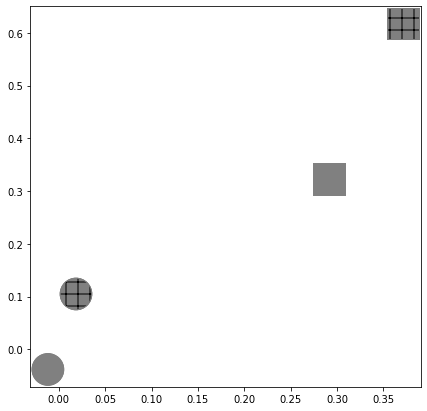

In [81]:
myencoding = Model(inputs=pipeline.input, outputs=pipeline.layers[2].get_output_at(-1))
encoded_info = myencoding.predict([x,x_neigh])

mypostkoopmanencoding = Model(inputs=pipeline.input, outputs=pipeline.layers[3].get_output_at(-1))
mypostkoopmanencoded_info = mypostkoopmanencoding.predict([x,x_neigh])

# use colormap
colormap = np.array(['red','blue']) # For Not-Spin/Spin 
markermap = np.array(["o","s","D","p"])
hatchmap = np.array(["","+"])
fig = plt.figure(figsize=(7,7))
# ax = fig.add_subplot(projection='3d')
for i in range(len(x)):
    plt.scatter(encoded_info[i,6],encoded_info[i,8], s=1000, marker=markermap[x[i]], hatch=hatchmap[spin[i]][0],c='grey')
    # plt.scatter(mypostkoopmanencoded_info[i,8],mypostkoopmanencoded_info[i,6],  s=800, c=colormap[spin[i]], marker=markermap[x[i]], hatch='|||')
plt.savefig('CArule30_koopman_invariant_subspace_dynamics.png')

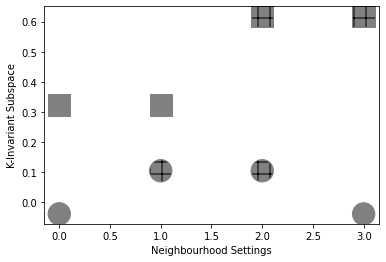

In [102]:
for i in range(len(x)):
    plt.scatter(neigh_setting[i],encoded_info[i,8], s=500, marker=markermap[x[i]], hatch=hatchmap[spin[i]][0], c='grey', label=x[i])

plt.xlabel('Neighbourhood Settings')
plt.ylabel('K-Invariant Subspace')
plt.savefig('CArule30_koopman_invariant_subspace_dynamics.png')

Text(0.5, 0, 'Cell')

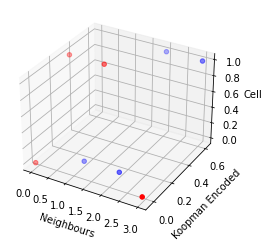

In [41]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(np.array([3,2,3,2,1,0,1,0]),encoded_info[:,8],x,c=colormap[spin.reshape(8)])
ax.set_xlabel('Neighbours')
ax.set_ylabel('Koopman Encoded')
ax.set_zlabel('Cell')

In [30]:
for i in range(9):
    print(np.var(encoded_info[:,i]))

0.010932222
0.016470592
0.044860333
0.0022374564
0.019719586
0.0123596005
0.027754735
0.0039063063
0.06111119


In [22]:
mylambda = Model(inputs=pipeline.input, outputs=pipeline.layers[3].get_output_at(-1))
lambda_info = mylambda.predict([x,x_neigh])

In [23]:
l=[]
for j in range(8):
    for i in range(1):
        if i<1:
            print(lambda_info[j,i*2],"+ i",lambda_info[j,i*2+1])
            l.append([lambda_info[j,i*2],lambda_info[j,i*2+1]])
        else:
            print(lambda_info[j,i],"+ i 0")
            l.append([lambda_info[j,i],0])
l=np.asarray(l)

0.26693103 + i 0.2908813
0.26699606 + i 0.29093713
0.07043494 + i -0.039103653
0.18493325 + i 0.017777272
0.2588566 + i 0.14337741
0.2588548 + i 0.14336433
0.18493325 + i 0.017777272
0.07078626 + i -0.038911957


In [24]:
l.shape

(8, 2)

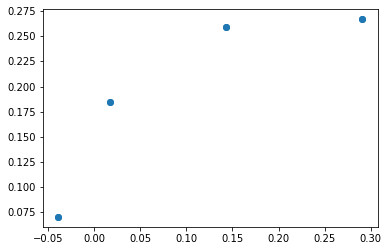

In [25]:
colormap = np.array(['red','blue','yellow','violet','green','grey','cyan','pink'])
for i in range(8):
    plt.scatter(l[8*i:8*(i+1),1],l[8*i:8*(i+1),0])

In [26]:
pipeline.layers

In [27]:
pipeline.layers[2].layers

In [28]:
pipeline.layers[3].layers

In [29]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.test.is_gpu_available()

Num GPUs Available:  0


False